### Step 1: Import necessary libraries

In [3]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords
from matplotlib import pyplot as plt
from nltk.stem import WordNetLemmatizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Step 2: Read the Dataset

In [4]:
df = pd.read_csv('./Dataset/Combined_News_DJIA.csv')
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [5]:
#check data shape, that is the number of rows and columns in the dataset
df.shape

(1989, 27)

In [6]:
#get the information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1989 non-null   object
 1   Label   1989 non-null   int64 
 2   Top1    1989 non-null   object
 3   Top2    1989 non-null   object
 4   Top3    1989 non-null   object
 5   Top4    1989 non-null   object
 6   Top5    1989 non-null   object
 7   Top6    1989 non-null   object
 8   Top7    1989 non-null   object
 9   Top8    1989 non-null   object
 10  Top9    1989 non-null   object
 11  Top10   1989 non-null   object
 12  Top11   1989 non-null   object
 13  Top12   1989 non-null   object
 14  Top13   1989 non-null   object
 15  Top14   1989 non-null   object
 16  Top15   1989 non-null   object
 17  Top16   1989 non-null   object
 18  Top17   1989 non-null   object
 19  Top18   1989 non-null   object
 20  Top19   1989 non-null   object
 21  Top20   1989 non-null   object
 22  Top21   1989 non-null   

### Step 3: EDA (Exploratory Data Analysis)

<AxesSubplot:xlabel='Label', ylabel='count'>

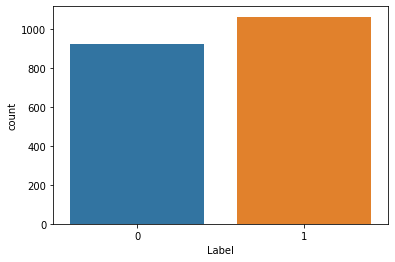

In [7]:
#checking the count of target variable
sns.countplot(x=df['Label'])

### Step 4: Data preprocessing

In [8]:
#checking null values
df.isnull().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64

In [9]:
#remove rows that contain null values
df.dropna(inplace= True)

In [10]:
#splitting dataset
df_train = df[df['Date'] < '20150101']
df_test = df[df['Date'] > '20141231']
print("Training Data contains {} samples".format(df_train.shape[0]))
print("Testing Data contains {} samples".format(df_test.shape[0]))

Training Data contains 1860 samples
Testing Data contains 378 samples


In [11]:
#make a function to clean the data and combine headlines
def preprocess(df):
    data = df.iloc[:,2:27]
    #remove everything apart from alphabets
    data.replace("[^a-zA-Z]", " ", regex=True, inplace=True)
    #create array for combined headlines
    combined_headlines = []
    #iterate over the dataset and join the headlines
    for i in range(len(data.index)):
        combined_headlines.append(' '.join(str(x) for x in data.iloc[i, :]))
    return combined_headlines

In [12]:
# clean combine the headlines in single column
X_train = preprocess(df_train)
X_test = preprocess(df_test)

In [13]:
print("Training Data contains {} samples".format(len(X_train)))
print("Testing Data contains {} samples".format(len(X_test)))

Training Data contains 1860 samples
Testing Data contains 378 samples


In [14]:
#further cleaning and lemmatization
def lemmatization(data, lemmatizer):
    lemmatized_data = []
    for i in range(len(data)):
        text = data[i].lower()
        text = text.split()
        text = [lemmatizer.lemmatize(word) for word in text if word not in stopwords.words('english')]
        lemmatized_data.append(' '.join(text))
    return lemmatized_data

lemmatizer = WordNetLemmatizer()

# lemmatize data
X_train = lemmatization(X_train, lemmatizer)
X_test = lemmatization(X_test, lemmatizer)

In [15]:
#count vectorizer
cv = CountVectorizer(ngram_range=(2,2))
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

### Step 5: Model Training
##### 1. Random Forest Classifier

In [28]:
#model instantiation and model fitting
model = RandomForestClassifier()
model.fit(X_train, df_train['Label'])

RandomForestClassifier()

In [17]:
#model prediction on the training and testing set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [18]:
#Training and testing accuracy
print("Training Accuracy:",accuracy_score(df_train['Label'], y_train_pred)*100)
print("Testing Accuracy:",accuracy_score(df_test['LaRandom Forest Classifierbel'], y_test_pred)*100)

Training Accuracy: 100.0
Testing Accuracy: 84.92063492063492


In [19]:
#get the classification report
print("Classification Report: \n", classification_report(df_test['Label'],y_test_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.70      0.82       186
           1       0.77      0.99      0.87       192

    accuracy                           0.85       378
   macro avg       0.88      0.85      0.85       378
weighted avg       0.88      0.85      0.85       378



<AxesSubplot:>

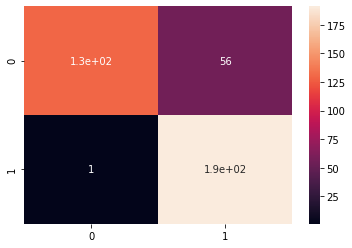

In [20]:
#plotting the confusion matrix
sns.heatmap(confusion_matrix(df_test['Label'],y_test_pred),annot=True)

##### 2. Multinomial Naive Bayes

In [23]:
#model instantiation and model fitting
model = MultinomialNB()
model.fit(X_train, df_train['Label'])

MultinomialNB()

In [24]:
#model prediction on the training and testing set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [25]:
#Training and testing accuracy
print("Training Accuracy:",accuracy_score(df_train['Label'], y_train_pred)*100)
print("Testing Accuracy:",accuracy_score(df_test['Label'], y_test_pred)*100)

Training Accuracy: 100.0
Testing Accuracy: 84.12698412698413


In [26]:
#get the classification report
print("Classification Report: \n", classification_report(df_test['Label'],y_test_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.80      0.83       186
           1       0.82      0.88      0.85       192

    accuracy                           0.84       378
   macro avg       0.84      0.84      0.84       378
weighted avg       0.84      0.84      0.84       378



<AxesSubplot:>

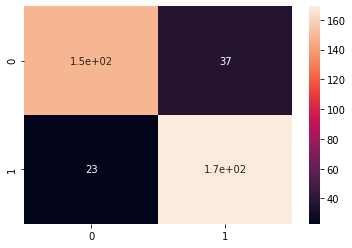

In [27]:
#plotting the confusion matrix
sns.heatmap(confusion_matrix(df_test['Label'],y_test_pred),annot=True)